Real Iris Dataset - to read iris dataset and build a decision tree

In [16]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       #Import Decision Tree Classifier, to build a classification decision tree
from sklearn.model_selection import train_test_split  #Import train_test_split function
from sklearn import metrics                           #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt                  #Plot decision tree
from sklearn import tree                              #Plot decision tree

In [10]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CS6140 Assignment1/iris dataset.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
#split dataset in features and target variable
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = dataset[feature_cols]                         #Assign all feature columns into variable x
y = dataset['species']                            #Assign all target columns into variable y
print("feature variables\n", x, "\n")
print("label\n", y)

feature variables
      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 

label
 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [12]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  # Split dataset into 70% training dataset, 30% testing dataset
print(x_train.shape , y_train.shape)

(105, 4) (105,)


In [13]:
model = DecisionTreeClassifier(criterion="gini")
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [14]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: setosa
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: virginica



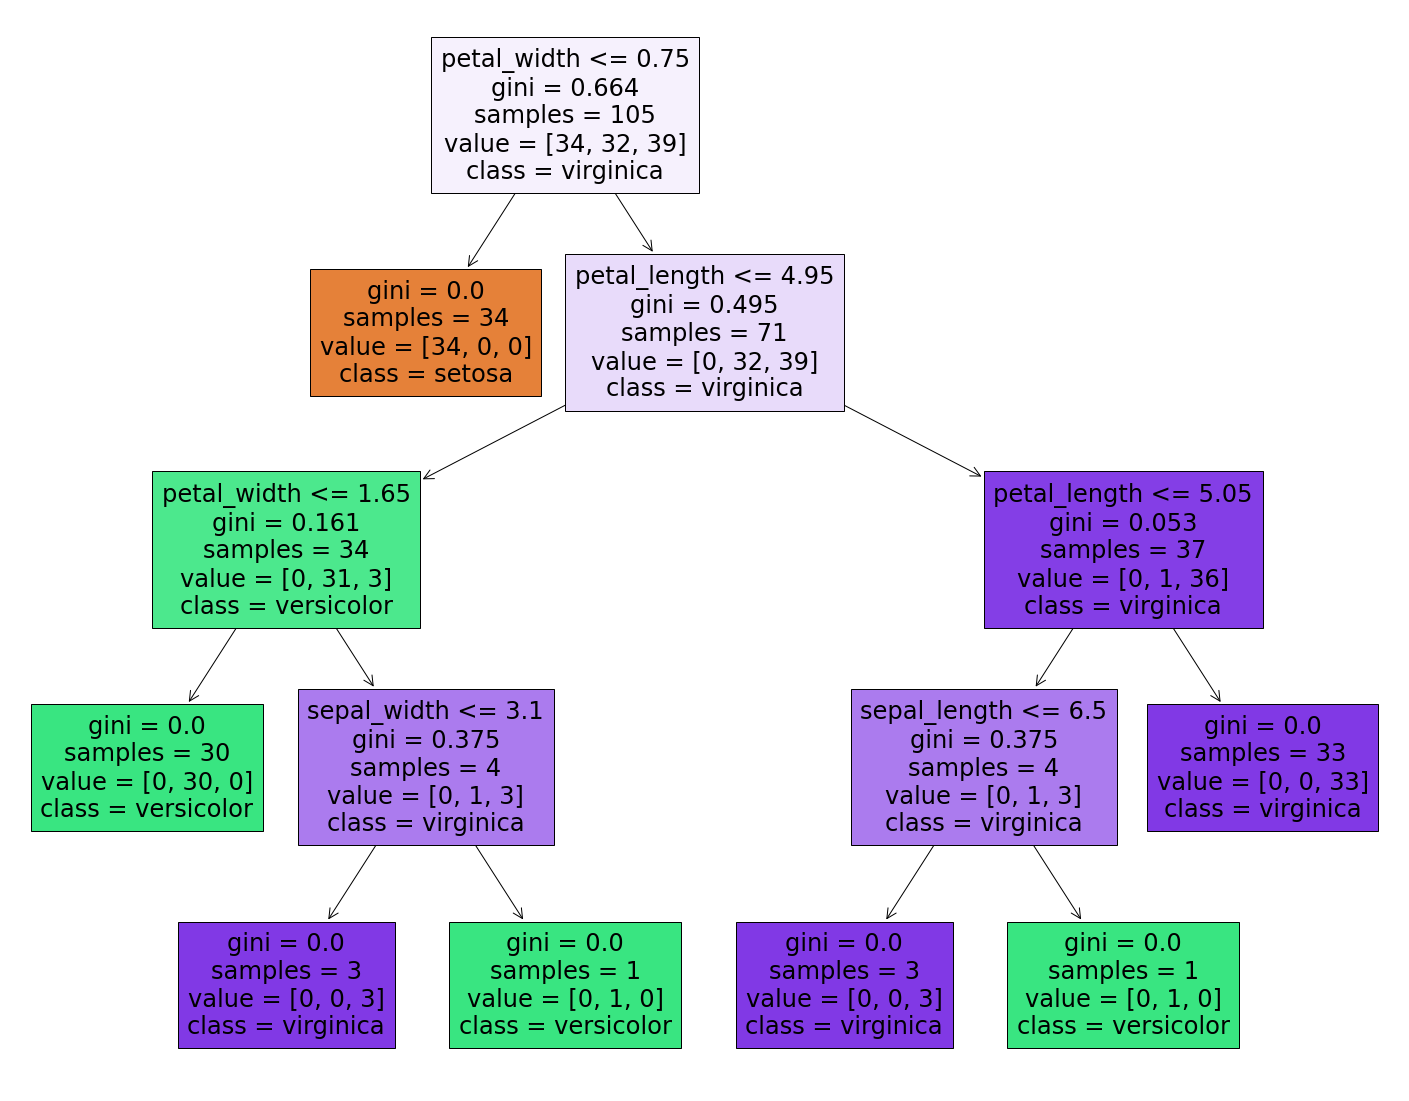

In [17]:
fig = plt.figure(figsize=(25,20))
plt.title("Decision tree trained on all the iris features")
_ = tree.plot_tree(model, 
                   feature_names=feature_cols,  
                   class_names=['setosa','versicolor','virginica'],
                   filled=True)

In [ ]:
print("Testing Accuracy : " , metrics.accuracy_score(y_test, y_pred))

Testing Accuracy :  0.9333333333333333
